In [2]:
# # imports

# import numpy as np
# import os, glob
# import pandas as pd
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# # 

In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
# %matplotlib inline

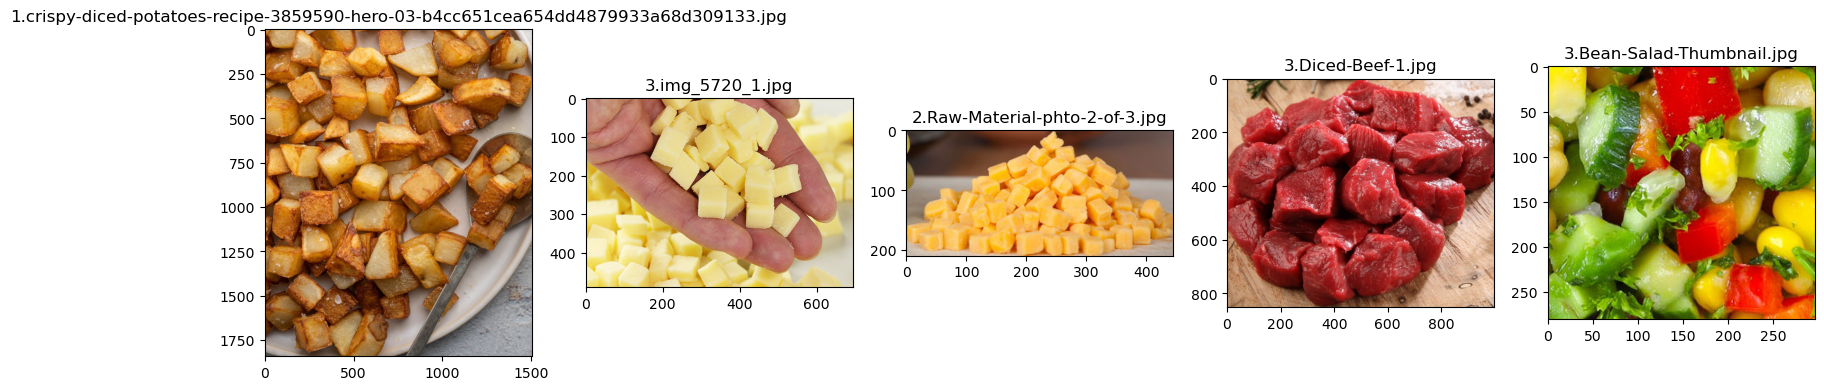

In [10]:
img_folder = 'train/diced/'

plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [19]:
# creating the dataset

# normalize,with tensorflow 
# tf.img std


# ideal size of images
IMG_WIDTH=224
IMG_HEIGHT=224
img_folder = 'train/'


# for dir1 in os.listdir(img_folder):
#     print(dir1)

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        try:
            for file in os.listdir(os.path.join(img_folder, dir1)):
        
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                image=np.array(image)
                image = image.astype('float32')
                image /= 255 
                img_data_array.append(image)
                class_name.append(dir1)
        except:
            pass
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset(img_folder)

target_dict={k: v for v, k in enumerate(np.unique(class_name))}

print(target_dict, len(img_data))


{'creamy_paste': 0, 'diced': 1, 'floured': 2, 'grated': 3, 'juiced': 4, 'jullienne': 5, 'mixed': 6, 'other': 7, 'peeled': 8, 'sliced': 9, 'whole': 10} 198


In [23]:
num_skipped = 0
img_folder = 'train/'

# ideal size of images
IMG_WIDTH=224
IMG_HEIGHT=224
img_folder = 'train/'



0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
0010.jpg
0011.jpg
0012.jpg
0013.jpg
0014.jpg
0015.jpg
0016.jpg
16.97a83029cfb49fbeeae0794158fc4756.jpg
16.CREAM-CHEESE.jpg
0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
1.Buy-Diced-Beef-400g-Online-Meat-Supermarket.jpg
1.crispy-diced-potatoes-recipe-3859590-hero-03-b4cc651cea654dd4879933a68d309133.jpg
1.Diced-Cheese-from-Spinneyfields.jpg
2.Cook-Diced-Beef-Final.jpg
2.photo-28.jpg
2.Raw-Material-phto-2-of-3.jpg
3.Bean-Salad-Thumbnail.jpg
3.Diced-Beef-1.jpg
3.img_5720_1.jpg
4.diced-cheese-heap-semi-firm-plate-31583069.jpg
4.F2D501BF-8BE1-4F25-8257-75CB99CECCF6-scaled.jpeg
4.How-long-to-Cook-Diced-Potatoes-2-scaled.jpg
5.diced-cheddar-cheese-squares-bowl-over-white-top-view-39369393.jpg
0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
1.floured-surface.jpg
2.Floured-Surface.jpg
3.349745653.jpg
3.hartington_wedge_stilton_04_cheese.jpg
4.floured-board.jpg
5.floured-covered-surfac